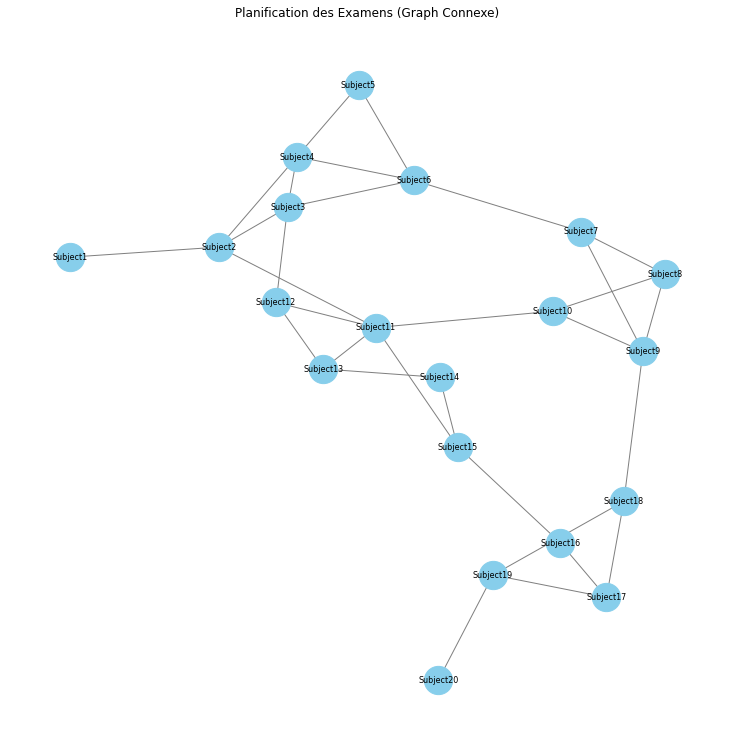

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import json

# Create a connected graph with 20+ subjects
num_subjects = 20
subjects = [f"Subject{i}" for i in range(1, num_subjects + 1)]
G = nx.Graph()

# Add nodes
G.add_nodes_from(subjects)

# Ensure the graph is connected (spanning tree)
for i in range(1, num_subjects):
    G.add_edge(f"Subject{i}", f"Subject{i + 1}")

# Add random edges (constraints)
num_extra_edges = random.randint(num_subjects, num_subjects * 2)
while len(G.edges) < num_extra_edges:
    sub1, sub2 = random.sample(subjects, 2)
    if not G.has_edge(sub1, sub2):
        G.add_edge(sub1, sub2)

# Verify the graph is connected
assert nx.is_connected(G), "The graph is not connected!"

# Save the graph as an adjacency list
graph_data = nx.to_dict_of_lists(G)
with open("graph_data.json", "w") as f:
    json.dump(graph_data, f)

# Draw the graph with smaller size
plt.figure(figsize=(10, 10))  # Reduced figure size
pos_spread = nx.spring_layout(G, k=0.5)
nx.draw(
    G,
    pos=pos_spread,
    with_labels=True,
    node_size=800,  # Smaller node size
    font_size=8,    # Smaller font size for labels
    node_color="skyblue",
    edge_color="gray"
)
plt.title("Planification des Examens (Graph Connexe)", fontsize=12)
plt.show()


In [24]:
import networkx as nx
import json

# Load the graph from the saved adjacency list
with open("graph_data.json", "r") as f:
    graph_data = json.load(f)

# Recreate the graph
G = nx.Graph(graph_data)

# Graph coloring using a greedy algorithm
color_map = nx.coloring.greedy_color(G, strategy="largest_first")

# Group the nodes by color
color_groups = {}
for node, color in color_map.items():
    if color not in color_groups:
        color_groups[color] = []
    color_groups[color].append(node)

# Print the color groups
print("Color Groups:")
for color, nodes in color_groups.items():
    print(f"Color {color + 1}: {nodes}")


Color Groups:
Color 1: ['Subject11', 'Subject3', 'Subject9', 'Subject17', 'Subject5', 'Subject14', 'Subject1', 'Subject20']
Color 2: ['Subject2', 'Subject6', 'Subject8', 'Subject12', 'Subject15', 'Subject18']
Color 3: ['Subject4', 'Subject7', 'Subject10', 'Subject13', 'Subject19', 'Subject16']


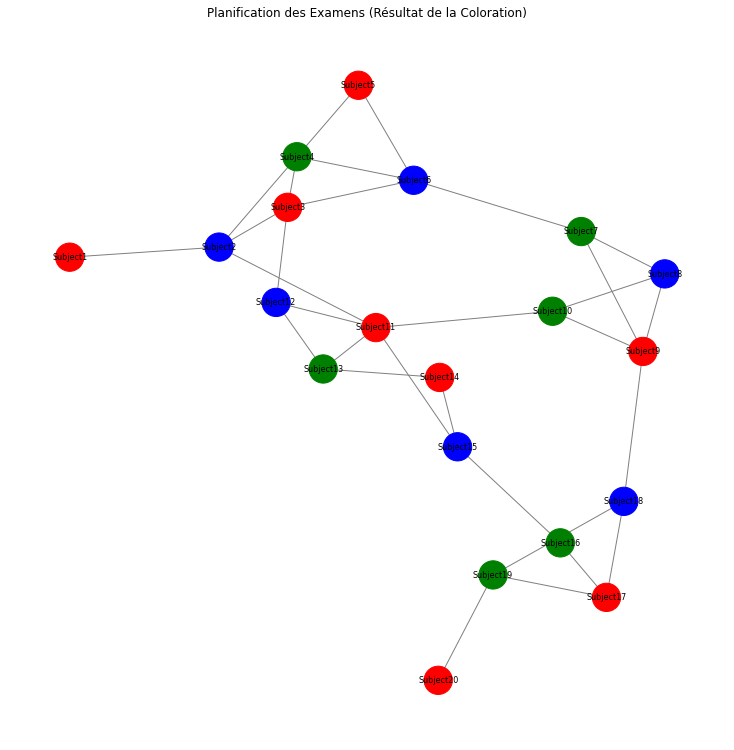

In [25]:
import matplotlib.pyplot as plt

# Assign colors to the nodes
color_palette = [
    "red", "blue", "green", "yellow", "orange", "purple", "pink", "brown", "cyan", "lime"
]
node_colors = [color_palette[color_map[node]] for node in G.nodes]

# Draw the colored graph with smaller figure size-
plt.figure(figsize=(10, 10))  # Reduced figure size
nx.draw(
    G,
    pos=pos_spread,
    with_labels=True,
    node_size=800,  # Smaller node size
    font_size=8,    # Smaller font size
    node_color=node_colors,
    edge_color="gray"
)
plt.title("Planification des Examens (Résultat de la Coloration)", fontsize=12)
plt.show()



In [ ]:
zzazaa